# 보스톤 주택 가격 - 다중 회귀

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['Price'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

### 산점도와 회귀 곡선

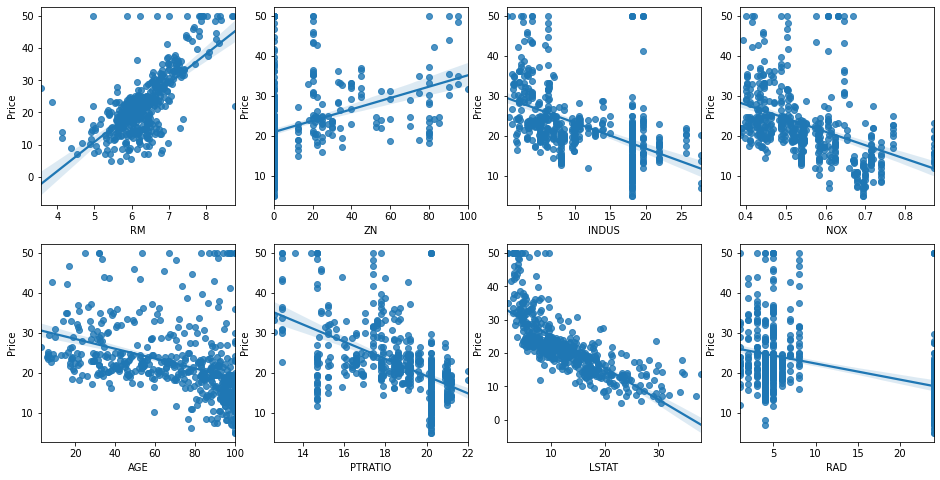

In [8]:
fig, ax = plt.subplots( figsize=(16,8), ncols = 4, nrows = 2 )
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row, col = int(i/4), i%4
    sns.regplot(x=feature, y='Price', data=df, ax = ax[row][col])
plt.show()

### sklearn 회귀 모델

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.3, random_state=156
)

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'MSE: {mse:.2f}, RMSE: {np.sqrt(mse):.2f}')
print(f'R_squared: {r2:.4f}')

MSE: 17.30, RMSE: 4.16
R_squared: 0.7572


In [13]:
lr.coef_

array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
       -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
        3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
       -5.66182106e-01])

In [14]:
lr.intercept_

40.9955951721641

### 회귀식
- PRICE = -1.13CRIM + 0.065ZN + 0.034INDUS + 3.05CHAS - 0.198NOX + 3.35RM + 0.006AGE - 1.74DIS + 0.356RAD - 0.014TAX - 0.92PTRATIO + 0.01B - 0.566*LSTAT + 40.99

### 교차 검증 cross_val_score

In [15]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()

In [16]:
neg_mean_scores = cross_val_score(lr, boston.data, boston.target,
                                 scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-neg_mean_scores)
avg_rmse = np.average(rmse_scores)

print('개별 MSE:', np.round(neg_mean_scores,2))
print('개별 RMSE:', np.round(rmse_scores,2))
print(f'평균 RMSE: {avg_rmse:.4f}')

개별 MSE: [-12.46 -26.05 -33.07 -80.76 -33.31]
개별 RMSE: [3.53 5.1  5.75 8.99 5.77]
평균 RMSE: 5.8287
